<h3> Program to prepare animation of dispersion of different particle types for a small patch of particles

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import colors,cm
from scipy import stats
from matplotlib.animation import FuncAnimation
from datetime import timedelta

In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [9]:
home_folder = "/nethome/manra003/analysis/dispersion/simulations/"
output_folder = "/nethome/manra003/analysis/dispersion/outputs/"


types = ['2D','3D','DVM','sinking']
month = 'Jan'

ds1 = xr.open_zarr(home_folder + types[0] + "/BenguelaUpwR_1ov16_321x241res_{0}2017_1z_100days.zarr".format(month))
ds2 = xr.open_zarr(home_folder + types[1] + "/BenguelaUpwR_noneres_{0}2017_1z_100days.zarr".format(month))
ds3 = xr.open_zarr(home_folder + types[2] + "/BenguelaUpwR_noneres_{0}2017_1z_100days.zarr".format(month))
ds4 = xr.open_zarr(home_folder + types[3] + "/BenguelaUpwR_1ov16_321x241res_{0}2017_1z_100days.zarr".format(month))

<h4>subset a patch from the releast set

In [10]:
release_lats = ds1.lat[:,0].values
release_lons = ds1.lon[:,0].values

min_lat, max_lat = -30, -28
min_lon, max_lon = 12, 14


indices = np.where(((release_lons<=max_lon) & (release_lons>=min_lon)) & ((release_lats<=max_lat) & (release_lats>=min_lat)))

sel_lats = release_lats.take(indices)[0]
sel_lons = release_lons.take(indices)[0]
len(sel_lats)

1184

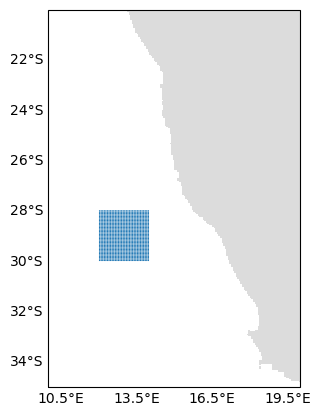

In [11]:
custom_size=10
fig = plt.figure(figsize=(5,5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
ax.set_xlim(10, 20)
ax.set_ylim(-35, -20)

scatter=ax.scatter(sel_lons, sel_lats,s=1,  marker='o',edgecolors='none')

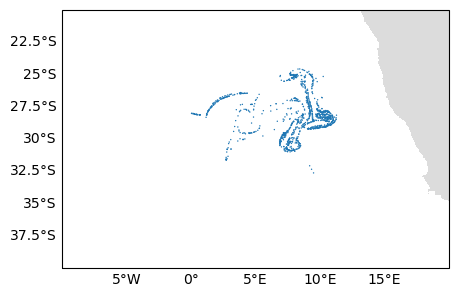

In [12]:
custom_size=10
fig = plt.figure(figsize=(5,5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
ax.set_xlim(-10, 20)
ax.set_ylim(-40, -20)

scatter=ax.scatter(ds4.lon[:,-1].values.take(indices), ds4.lat[:,-1].values.take(indices), s=1,  marker='o',edgecolors='none')

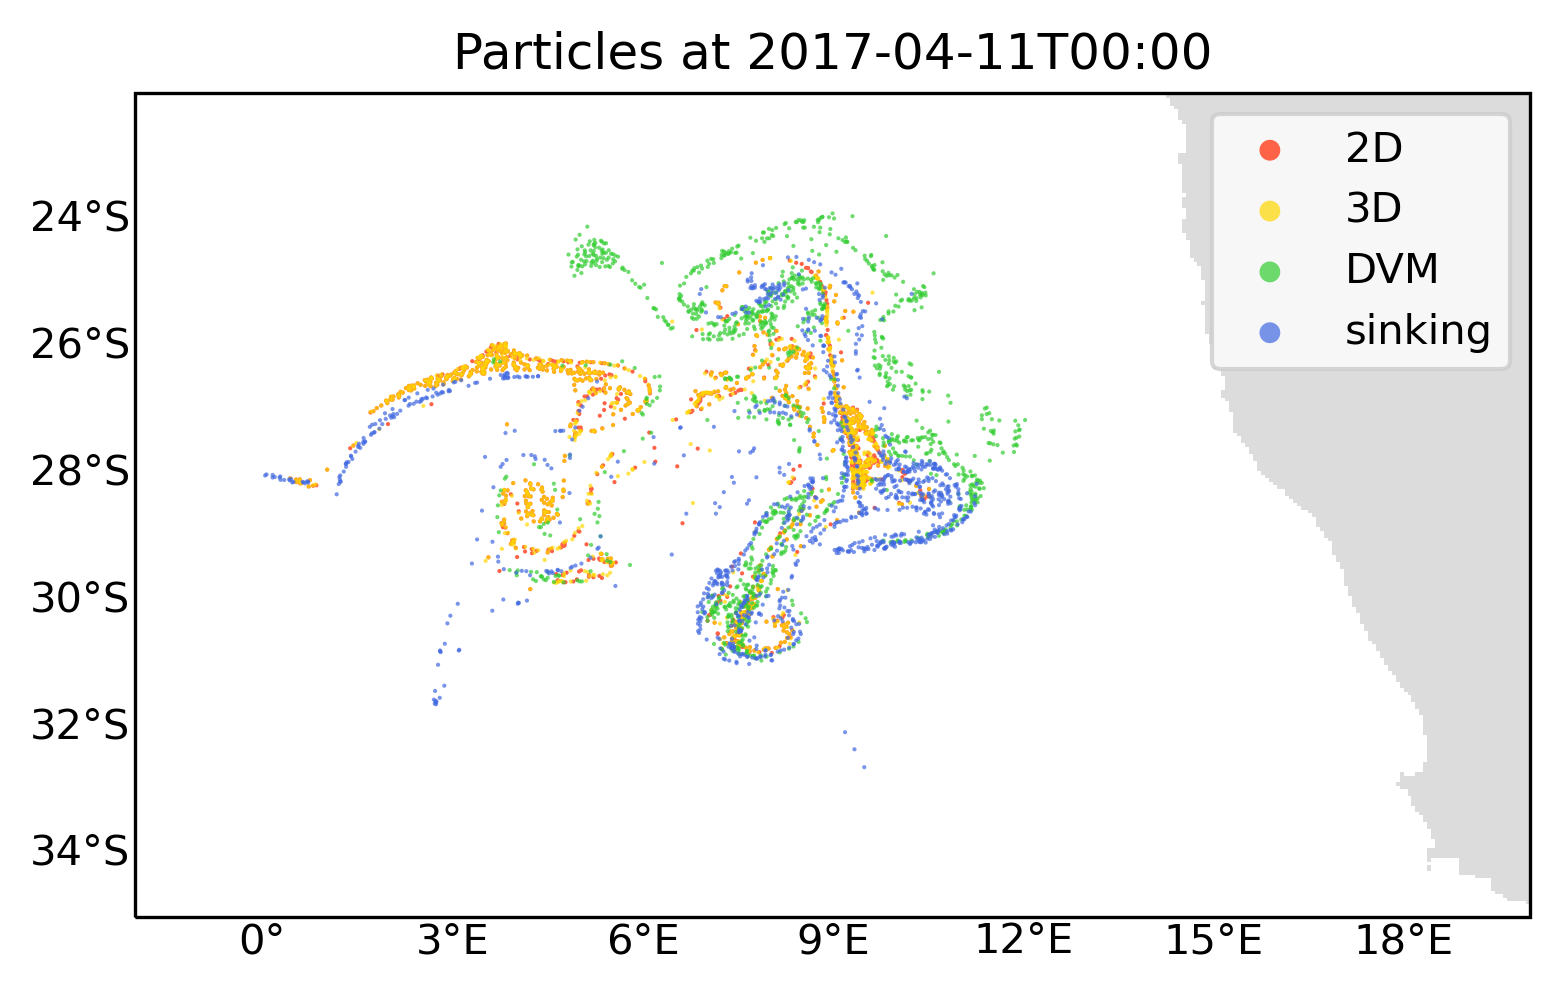

In [13]:
# 1: 2D, 2: 3D, 3: DVM, 4: BP 
custom_size=10
fig = plt.figure(figsize=(6,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
ax.set_xlim(-2, 20)
ax.set_ylim(-35, -22)

output_dt = timedelta(days=1)
time_range = np.arange(np.nanmin(ds1['time'].values),
                       np.nanmax(ds1['time'].values) + np.timedelta64(output_dt),
                       output_dt) 

# default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_colors = ['tomato', 'gold', 'limegreen', 'royalblue']

scatter1 = ax.scatter(ds1['lon'][:, 0].values.take(indices), ds1['lat'][:, 0].values.take(indices), s=1, c=default_colors[0], marker='o',edgecolors='none', label= "2D")
scatter2 = ax.scatter(ds2['lon'][:, 0].values.take(indices), ds2['lat'][:, 0].values.take(indices), s=1, c=default_colors[1], marker='o',edgecolors='none', label= "3D", alpha=0.7)
scatter3 = ax.scatter(ds3['lon'][:, 0].values.take(indices), ds3['lat'][:, 0].values.take(indices), s=1, c=default_colors[2], marker='o',edgecolors='none', label= "DVM", alpha=0.7)
scatter4 = ax.scatter(ds4['lon'][:, 0].values.take(indices), ds4['lat'][:, 0].values.take(indices), s=1, c=default_colors[3], marker='o',edgecolors='none', label= "sinking",alpha=0.7)

ax.legend(markerscale=5)

t = np.datetime_as_string(time_range[0], unit='m')
title = ax.set_title('Particles at ' + t)

def animate(i):
    t = np.datetime_as_string(time_range[i], unit='m')
    title.set_text('Particles at ' + t)

    scatter1.set_offsets(np.c_[ds1['lon'][:,i].values.take(indices)[0], ds1['lat'][:,i].values.take(indices)[0]])
    scatter2.set_offsets(np.c_[ds2['lon'][:,i].values.take(indices)[0], ds2['lat'][:,i].values.take(indices)[0]])
    scatter3.set_offsets(np.c_[ds3['lon'][:,i].values.take(indices)[0], ds3['lat'][:,i].values.take(indices)[0]])
    scatter4.set_offsets(np.c_[ds4['lon'][:,i].values.take(indices)[0], ds4['lat'][:,i].values.take(indices)[0]])
    

size = 101
anim = FuncAnimation(fig, animate, frames=size, interval=200)
anim.save(output_folder + 'animations/all_dispersion_{0}_2017.mp4'.format(month))
